In [1]:
# import packages 
import pandas as pd                   # data management
import matplotlib.pyplot as plt       # graphics 

# Jupyter command, puts plots in notebook 
%matplotlib inline

# check Python version 
import datetime as dt 
import sys
print('Today is', dt.date.today())
print('What version of Python are we running? \n', sys.version, sep='') 

Today is 2017-12-17
What version of Python are we running? 
3.6.3 |Anaconda, Inc.| (default, Oct  6 2017, 12:04:38) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


In [107]:
#data source = SELECTED CHARACTERISTICS OF THE NATIVE AND FOREIGN-BORN POPULATIONS  more information 2012-2016 American Community Survey 5-Year Estimates

acsdata = pd.read_csv('https://raw.githubusercontent.com/thischoi/Project_Data/master/ACS_2016_5year_full2.csv')
acsdata.columns

Index(['Id', 'Id2', 'Geography', 'Total; Estimate; Total population',
       'Total; Margin of Error; Total population',
       'Native; Estimate; Total population',
       'Native; Margin of Error; Total population',
       'Foreign born; Estimate; Total population',
       'Foreign born; Margin of Error; Total population',
       'Foreign born; Naturalized citizen; Estimate; Total population',
       ...
       'Total; Estimate; Renter-occupied housing units - GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS - 30 percent or more',
       'Total; Margin of Error; Renter-occupied housing units - GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS - 30 percent or more',
       'Native; Estimate; Renter-occupied housing units - GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS - 30 percent or more',
       'Native; Margin of Error; Renter-occupied housing units - GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS -

In [105]:
acsfilt = acsdata.filter(['Geography','Total; Estimate; Total population','Native; Estimate; Total population',
                          'Foreign born; Estimate; Total population',
                          'Foreign born; Naturalized citizen; Estimate; Total population',
                          'Foreign born; Not a U.S. citizen; Estimate; Total population',
                          'Total; Estimate; Civilian employed population 16 years and over',
                          'Native; Estimate; Civilian employed population 16 years and over',
                          'Foreign born; Estimate; Civilian employed population 16 years and over',
                          'Foreign born; Naturalized citizen; Estimate; Civilian employed population 16 years and over',
                          'Foreign born; Not a U.S. citizen; Estimate; Civilian employed population 16 years and over'],
                         axis = 1)

acsfilt.columns = ['State','Total Population','Native Population','Foreign Born Population',
                   'Foreign Born Population, Naturalized', 'Foreign Born Population, Not U.S. Citizen', 
                   'Total Population Employed','Native Population Employed','Foreign Born Population Employed',
                   'Foreign Born Population, Naturalized, Employed',
                   'Foreign Born Population, Not U.S. Citizen, Employed']

acsfilt['Foreign Born %'] = acsfilt['Foreign Born Population']/acsfilt['Total Population']
acsfilt['Foreign Born Employed %'] = acsfilt['Foreign Born Population Employed']/acsfilt['Foreign Born Population']
acsfilt['Foreign Born Naturalized Employed %'] = acsfilt['Foreign Born Population, Naturalized, Employed']/acsfilt['Foreign Born Population, Naturalized']
acsfilt['Foreign Born Not U.S. Citizen Employed %'] = acsfilt['Foreign Born Population, Not U.S. Citizen, Employed']/acsfilt['Foreign Born Population, Not U.S. Citizen']
acsfilt['Native Employed %'] = acsfilt['Native Population Employed']/acsfilt['Native Population']

acsfilt.set_index(['State'])

,Total Population,Native Population,Foreign Born Population,"Foreign Born Population, Naturalized","Foreign Born Population, Not U.S. Citizen",Total Population Employed,Native Population Employed,Foreign Born Population Employed,"Foreign Born Population, Naturalized, Employed","Foreign Born Population, Not U.S. Citizen, Employed",Foreign Born %,Foreign Born Employed %,Foreign Born Naturalized Employed %,Foreign Born Not U.S. Citizen Employed %,Native Employed %
State,,,,,,,,,,,,,,,
Alabama,4841164,4675660,165504,58841,106663,2042025,1945619,96406,33379,63027,0.034187,0.582500,0.567275,0.590898,0.416116
Alaska,736855,681608,55247,31138,24109,353954,318281,35673,20367,15306,0.074977,0.645700,0.654088,0.634867,0.466956
Arizona,6728577,5827029,901548,365345,536203,2879372,2392791,486581,210516,276065,0.133988,0.539717,0.576212,0.514852,0.410637
Arkansas,2968472,2829438,139034,44575,94459,1266552,1180834,85718,28017,57701,0.046837,0.616525,0.628536,0.610858,0.417339
California,38654206,28216576,10437630,5139275,5298355,17577142,11519296,6057846,3036569,3021277,0.270026,0.580385,0.590856,0.570229,0.408246
Colorado,5359295,4834851,524444,206682,317762,2692529,2370623,321906,128266,193640,0.097857,0.613804,0.620596,0.609387,0.490320
Connecticut,3588570,3085361,503209,248580,254629,1793688,1484501,309187,153895,155292,0.140225,0.614431,0.619096,0.609876,0.481143
Delaware,934695,852145,82550,38571,43979,438292,387078,51214,23649,27565,0.088318,0.620400,0.613129,0.626776,0.454240
District of Columbia,659009,566496,92513,38531,53982,348225,286298,61927,25681,36246,0.140382,0.669387,0.666502,0.671446,0.505384


In [22]:
acsfilt.columns

Index(['State', 'Total Population', 'Native Population',
       'Foreign Born Population', 'Foreign Born Population, Naturalized',
       'Foreign Born Population, Not U.S. Citizen',
       'Total Population Employed', 'Native Population Employed',
       'Foreign Born Population Employed',
       'Foreign Born Population, Naturalized, Employed',
       'Foreign Born Population, Not U.S. Citizen, Employed', 'Foreign Born %',
       'Foreign Born Employed %', 'Foreign Born Naturalized Employed %',
       'Foreign Born Not U.S. Citizen Employed %', 'Native Employed %'],
      dtype='object')

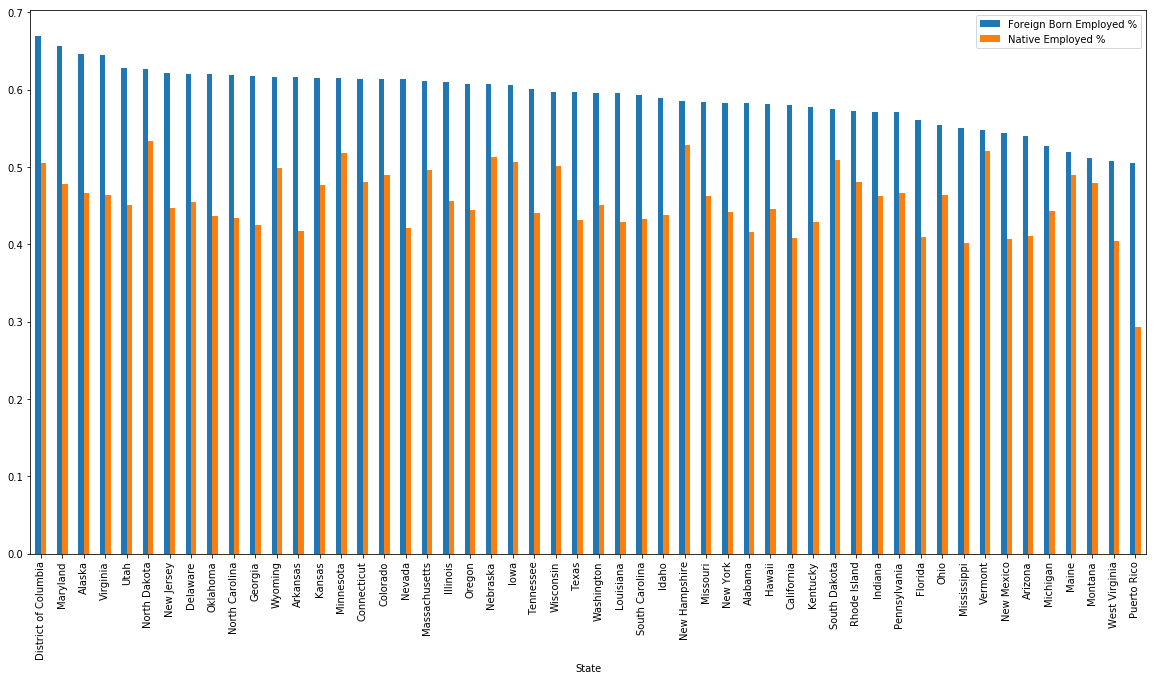

In [89]:
# Plots Foreign Born Employment percentage and Native Born Employment percentage

acsfilt.sort_values('Foreign Born Employed %', ascending=False).plot(x='State', y=['Foreign Born Employed %', 'Native Employed %'], kind='bar', figsize=(20,10))

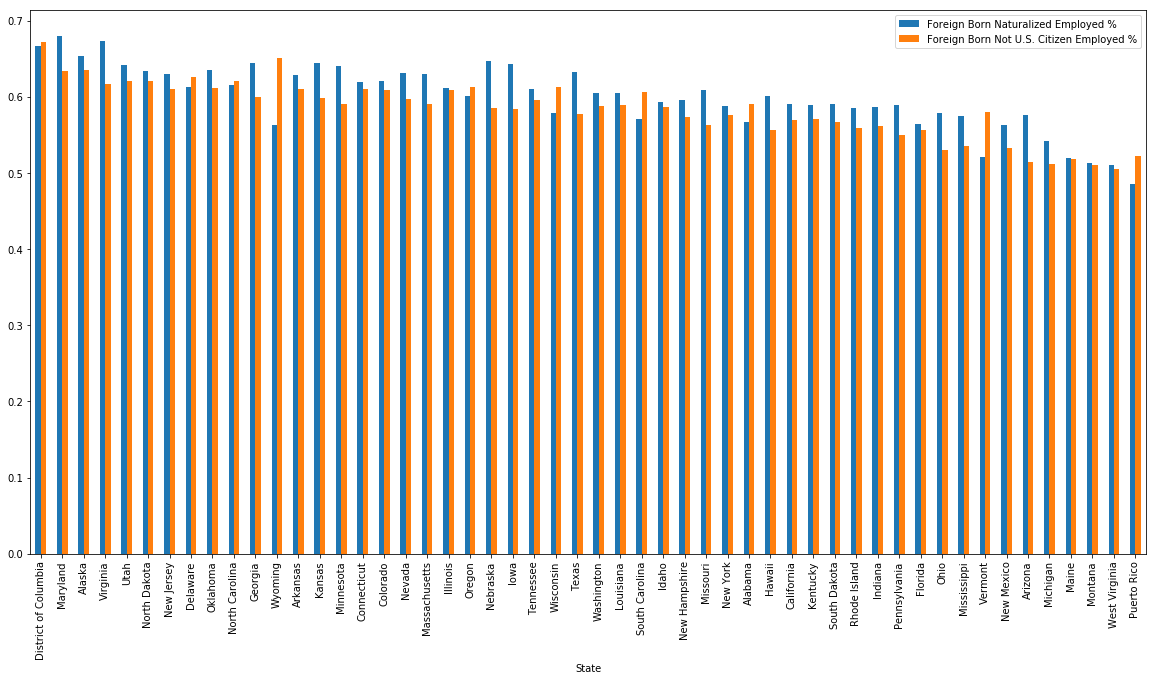

In [51]:
# Plots Foreign Born Nautralized Employment Percentage and Non-Citizen Employment Percentage, 
# ordered by total Foreign Born Percentage

acsfilt.sort_values('Foreign Born Employed %', ascending=False).plot(x='State', y=['Foreign Born Naturalized Employed %', 'Foreign Born Not U.S. Citizen Employed %'],kind='bar', figsize=(20,10))

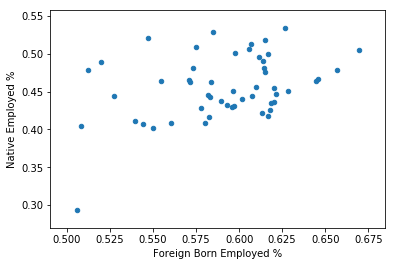

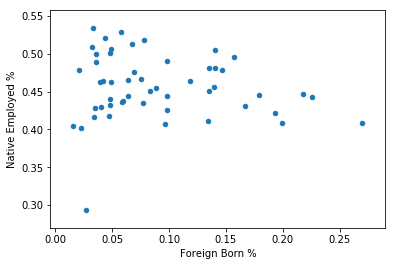

In [90]:
# Plot unemployment and foreign born as a percentage of the population

acsfilt.plot(kind='scatter', x='Foreign Born Employed %', y='Native Employed %')
acsfilt.plot(kind='scatter', x='Foreign Born %', y='Native Employed %')

In [91]:
# Unemployment data from BLS
# https://www.bls.gov/lau/lastrk16.htm

unemployment = pd.read_excel('https://github.com/thischoi/Project_Data/blob/master/unemployment.xlsx?raw=true')
unemployment['Rate'] = unemployment['Rate']/100
unemployment.set_index('State')

,Rate
State,
New Hampshire,0.028
South Dakota,0.028
Hawaii,0.030
Nebraska,0.032
North Dakota,0.032
Colorado,0.033
Vermont,0.033
Utah,0.034
Iowa,0.037


In [92]:
newdf = pd.merge(acsfilt, unemployment, on='State')
newdf = newdf.rename(index=str, columns={"Rate": "Unemployment Rate"})
newdf

,State,Total Population,Native Population,Foreign Born Population,"Foreign Born Population, Naturalized","Foreign Born Population, Not U.S. Citizen",Total Population Employed,Native Population Employed,Foreign Born Population Employed,"Foreign Born Population, Naturalized, Employed","Foreign Born Population, Not U.S. Citizen, Employed",Foreign Born %,Foreign Born Employed %,Foreign Born Naturalized Employed %,Foreign Born Not U.S. Citizen Employed %,Native Employed %,Unemployment Rate
0,Alabama,4841164,4675660,165504,58841,106663,2042025,1945619,96406,33379,63027,0.034187,0.582500,0.567275,0.590898,0.416116,0.060
1,Alaska,736855,681608,55247,31138,24109,353954,318281,35673,20367,15306,0.074977,0.645700,0.654088,0.634867,0.466956,0.066
2,Arizona,6728577,5827029,901548,365345,536203,2879372,2392791,486581,210516,276065,0.133988,0.539717,0.576212,0.514852,0.410637,0.053
3,Arkansas,2968472,2829438,139034,44575,94459,1266552,1180834,85718,28017,57701,0.046837,0.616525,0.628536,0.610858,0.417339,0.040
4,California,38654206,28216576,10437630,5139275,5298355,17577142,11519296,6057846,3036569,3021277,0.270026,0.580385,0.590856,0.570229,0.408246,0.054
5,Colorado,5359295,4834851,524444,206682,317762,2692529,2370623,321906,128266,193640,0.097857,0.613804,0.620596,0.609387,0.490320,0.033
6,Connecticut,3588570,3085361,503209,248580,254629,1793688,1484501,309187,153895,155292,0.140225,0.614431,0.619096,0.609876,0.481143,0.051
7,Delaware,934695,852145,82550,38571,43979,438292,387078,51214,23649,27565,0.088318,0.620400,0.613129,0.626776,0.454240,0.044
8,District of Columbia,659009,566496,92513,38531,53982,348225,286298,61927,25681,36246,0.140382,0.669387,0.666502,0.671446,0.505384,0.060
9,Florida,19934451,15966780,3967671,2134726,1832945,8755427,6532325,2223102,1203924,1019178,0.199036,0.560304,0.563971,0.556033,0.409120,0.049


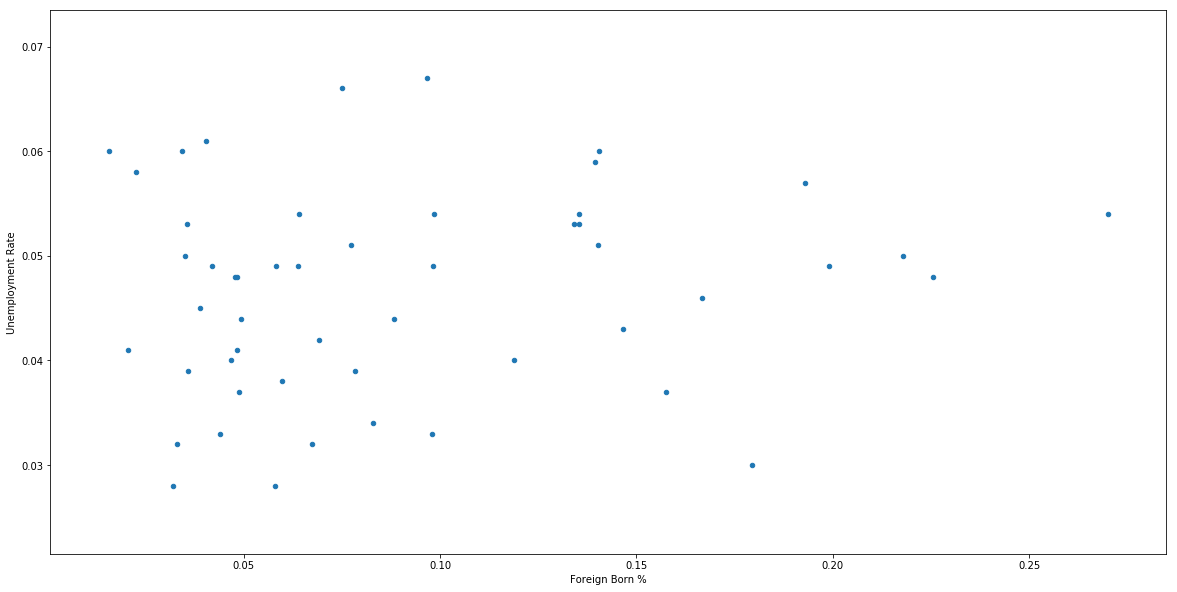

In [93]:
# Plot unemployment and foreign born as a percentage of the population

newdf.plot(kind='scatter', x='Foreign Born %', y='Unemployment Rate', figsize=(20,10))